In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline 

digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

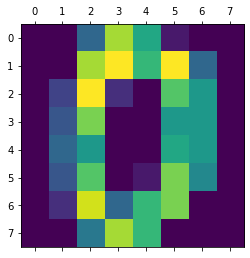

In [4]:
plt.matshow(digits.images[0])

In [11]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.1, random_state=43)
len(X_train)

1617

In [12]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=2800)
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2800,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
logmodel.score(x_test, y_test)

0.9777777777777777

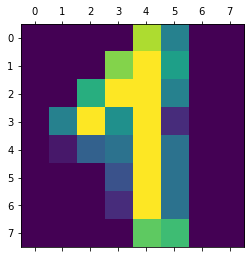

In [15]:
# Predicting the Digit
plt.matshow(digits.images[70])

In [17]:
digits.target[70]

1

In [19]:
# Numerical Predict
logmodel.predict([digits.data[70]])

array([1])

In [20]:
#Cross Validation
y_predict = logmodel.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[25,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 24,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 17]])

Text(66.5, 0.5, 'Truth')

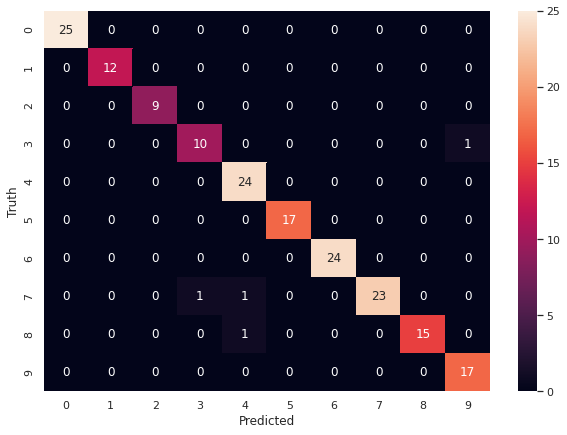

In [22]:
import seaborn as sns
sns.set()

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')